In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Pre-Processing

In [2]:
df=pd.read_csv('/Users/sonalpunchihewa/Downloads/bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.shape

(45211, 17)

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
#checking for null values
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#Checking for unique values
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
Target
['no' 'yes']


In [9]:
#finding variables with unique values
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
Target 2


In [10]:
#checking out categorical features in the dataset
categorical_variables=[variable for variable in df.columns if ((df[variable].dtypes=='O') & (variable not in ['deposit']))]
categorical_variables

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Target']

In [11]:
for variable in categorical_variables:
    print('The variable is {} and number of categories are {}'.format(variable,len(df[variable].unique())))

The variable is job and number of categories are 12
The variable is marital and number of categories are 3
The variable is education and number of categories are 4
The variable is default and number of categories are 2
The variable is housing and number of categories are 2
The variable is loan and number of categories are 2
The variable is contact and number of categories are 3
The variable is month and number of categories are 12
The variable is poutcome and number of categories are 4
The variable is Target and number of categories are 2


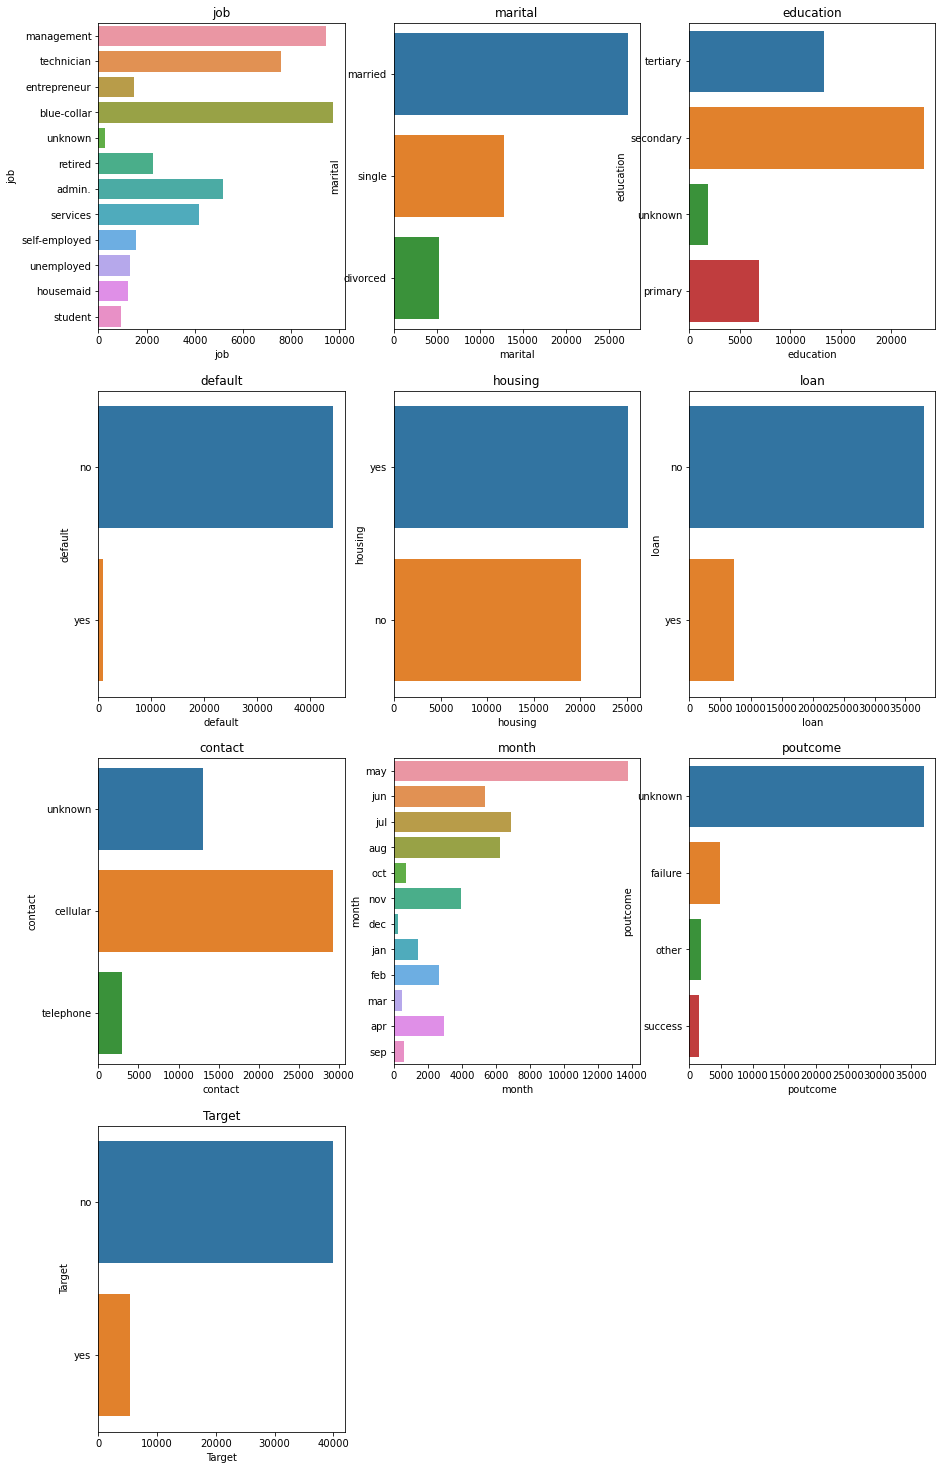

In [12]:
#checking categorical variables distribution
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_variable in categorical_variables:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_variable,data=df)
    plt.xlabel(categorical_variable)
    plt.title(categorical_variable)
    plotnumber+=1
plt.show()

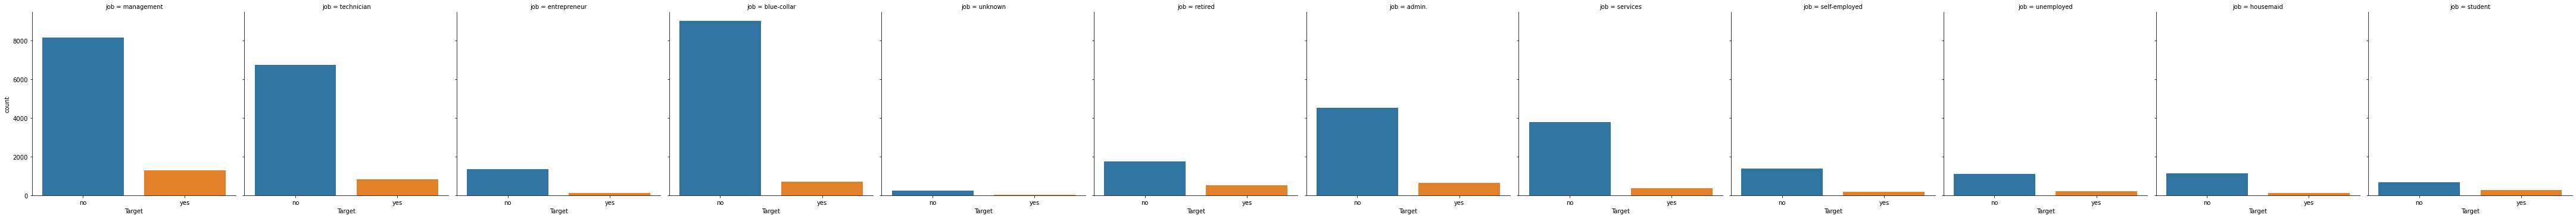

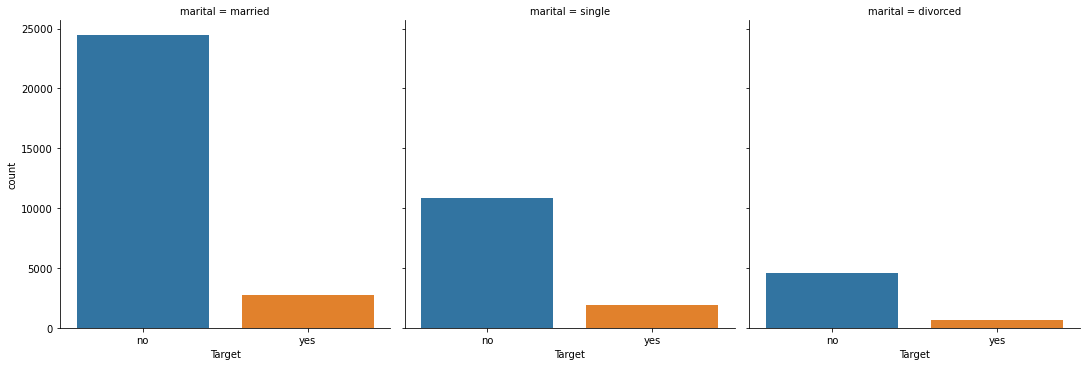

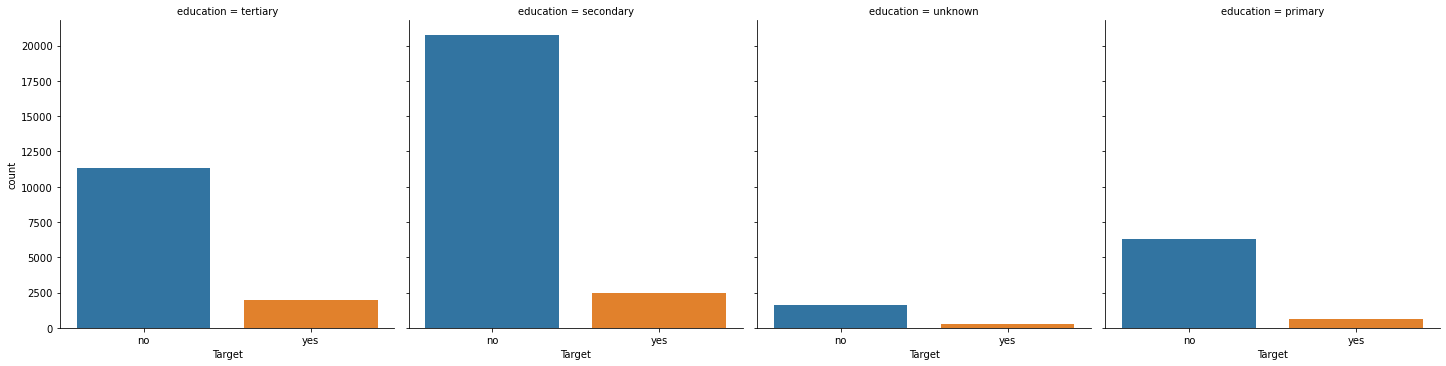

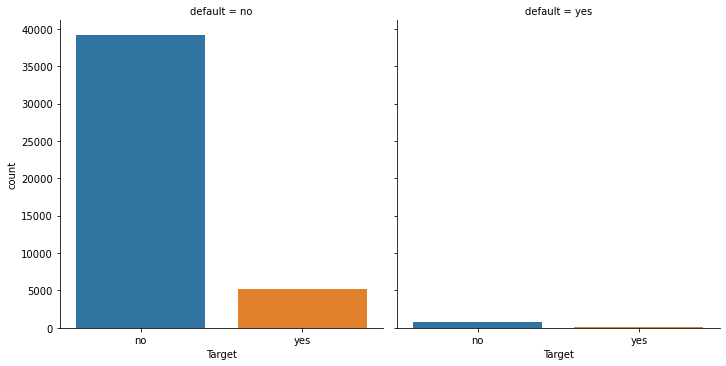

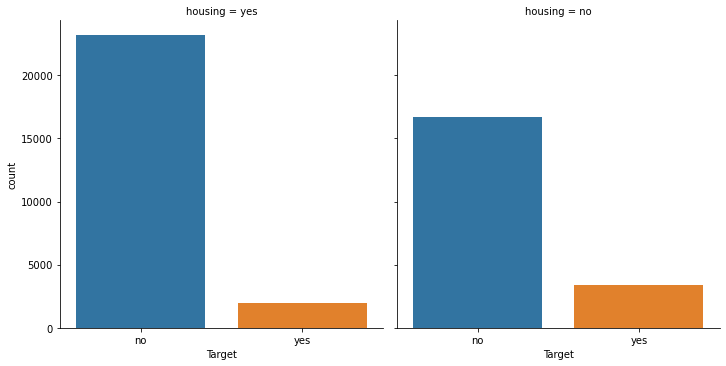

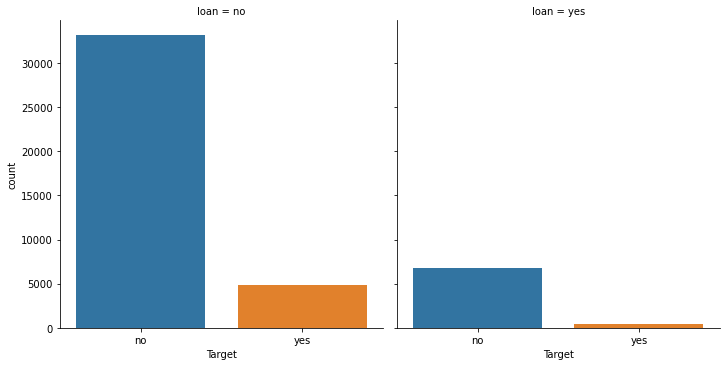

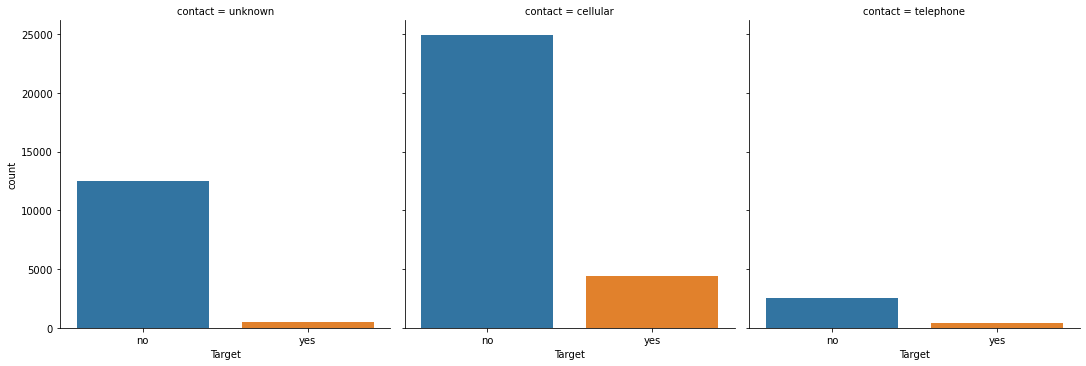

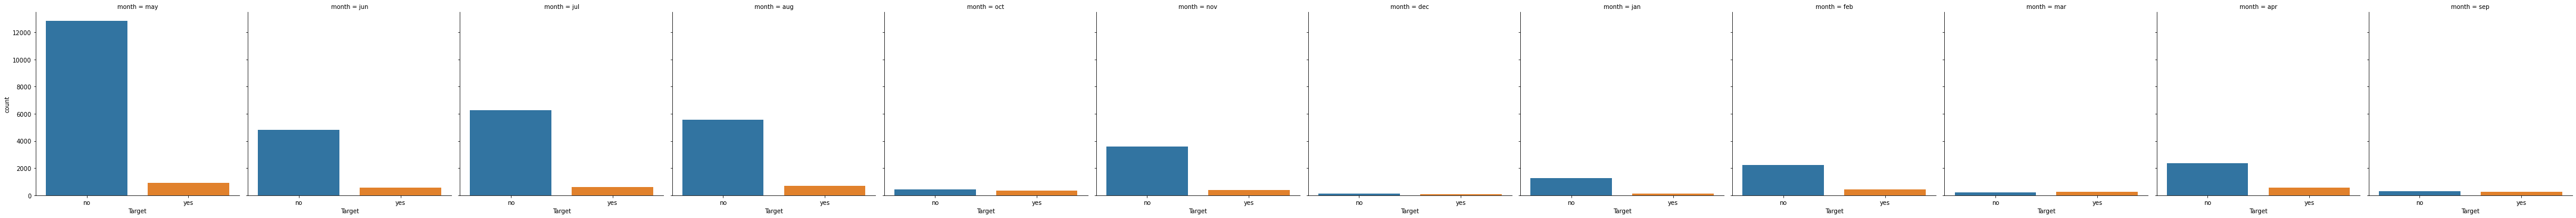

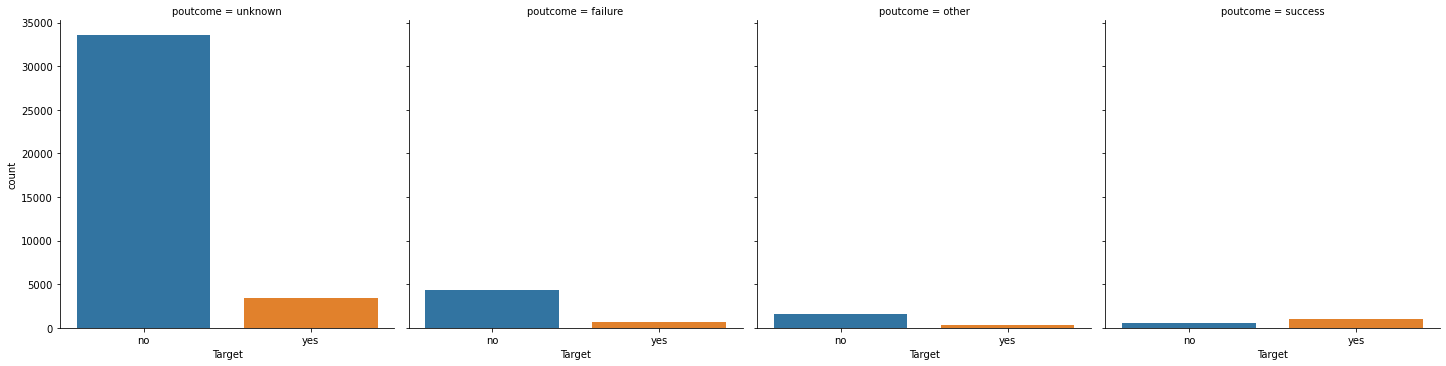

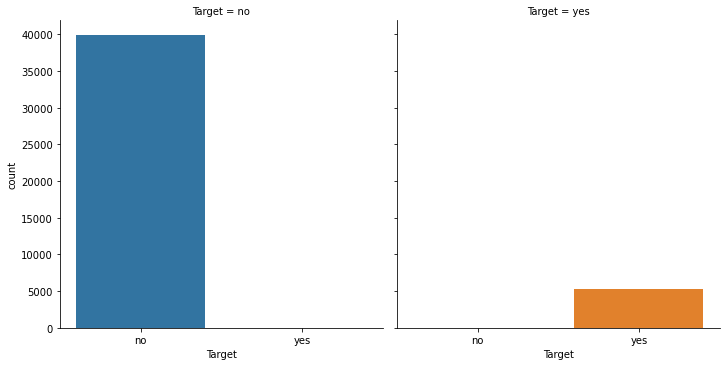

In [13]:
#Find out the relationship between categorical variable and dependent variable
for categorical_variable in categorical_variables:
    sns.catplot(x='Target', col=categorical_variable, kind='count', data= df)
plt.show()

In [14]:
#Check target label split over categorical variables and find the count
for categorical_variable in categorical_variables:
    print(df.groupby(['Target',categorical_variable]).size())

Target  job          
no      admin.           4540
        blue-collar      9024
        entrepreneur     1364
        housemaid        1131
        management       8157
        retired          1748
        self-employed    1392
        services         3785
        student           669
        technician       6757
        unemployed       1101
        unknown           254
yes     admin.            631
        blue-collar       708
        entrepreneur      123
        housemaid         109
        management       1301
        retired           516
        self-employed     187
        services          369
        student           269
        technician        840
        unemployed        202
        unknown            34
dtype: int64
Target  marital 
no      divorced     4585
        married     24459
        single      10878
yes     divorced      622
        married      2755
        single       1912
dtype: int64
Target  education
no      primary       6260
        second

In [15]:
# list of numerical variables
numerical_variables = [variable for variable in df.columns if ((df[variable].dtypes != 'O') & (variable not in ['Target']))]
print('Number of numerical variables: ', len(numerical_variables))

# visualise the numerical variables
df[numerical_variables].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [17]:
#finding discrete numerical features
discrete_feature=[feature for feature in numerical_variables if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [19]:
continuous_features=[feature for feature in numerical_variables if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

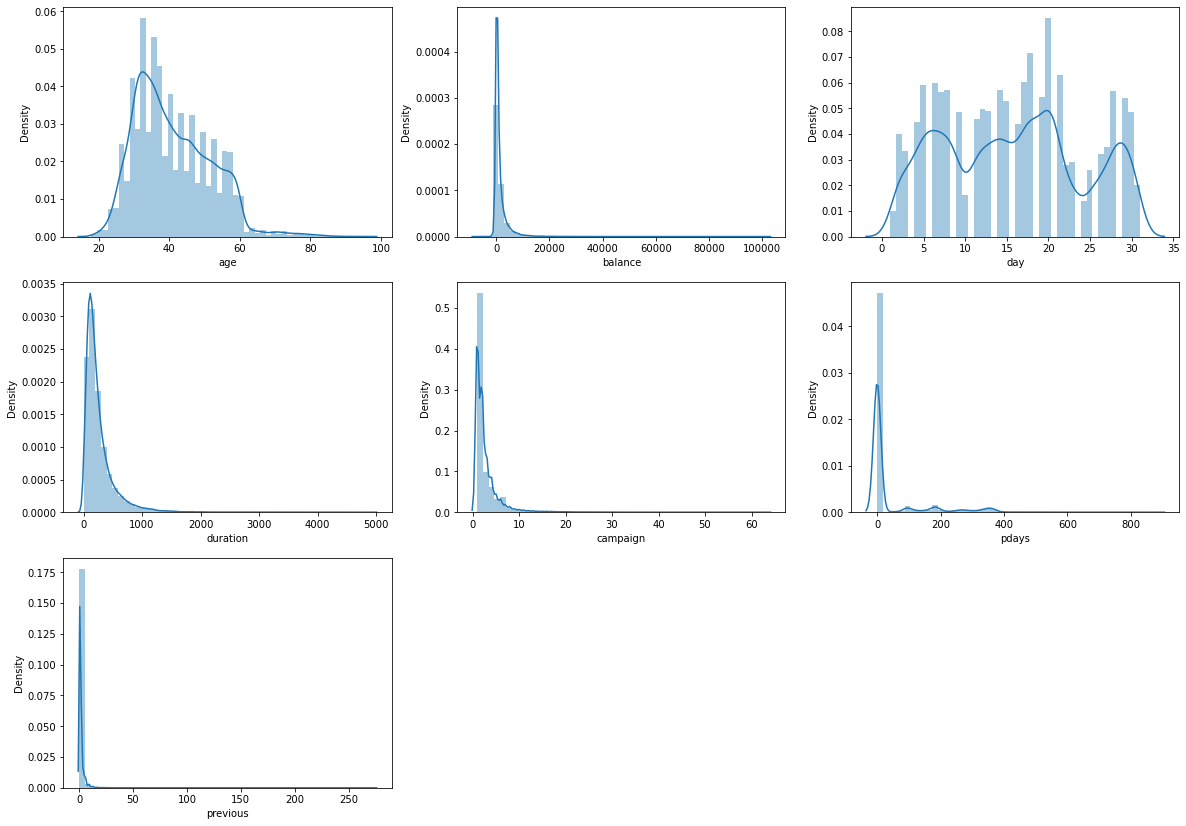

In [20]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

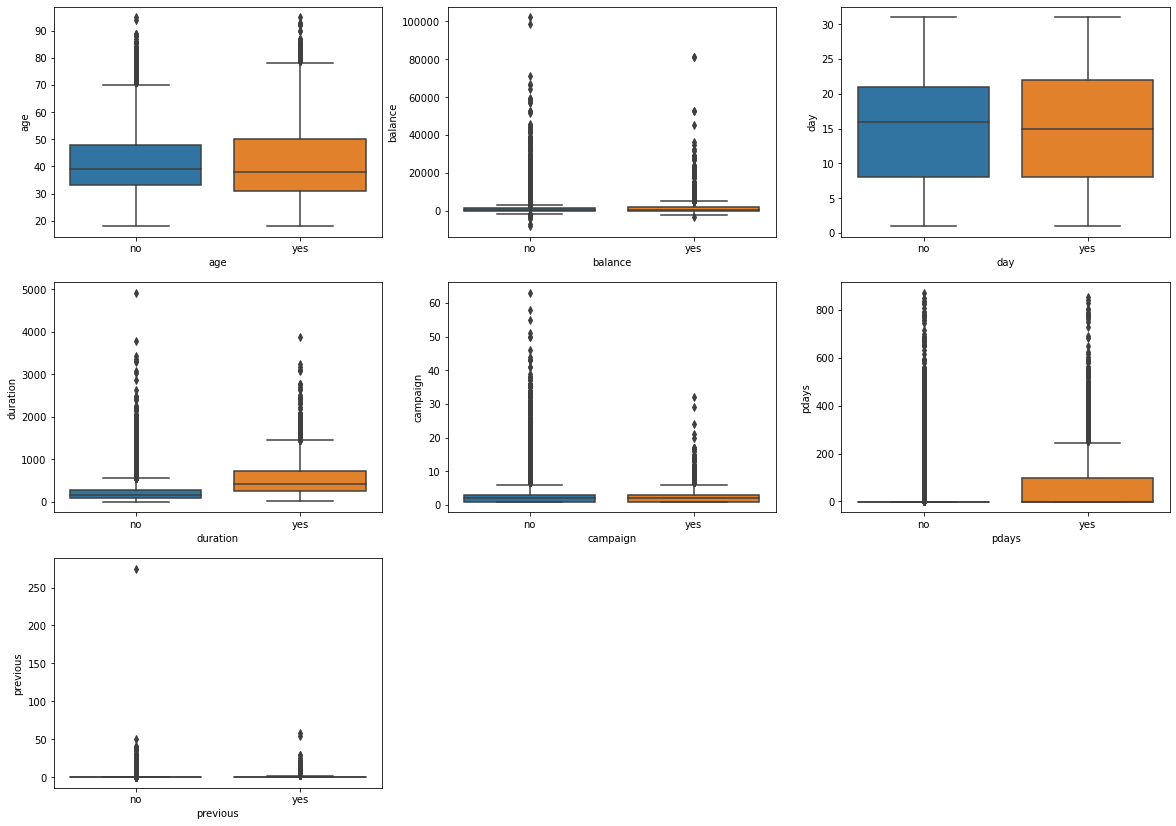

In [21]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="Target", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

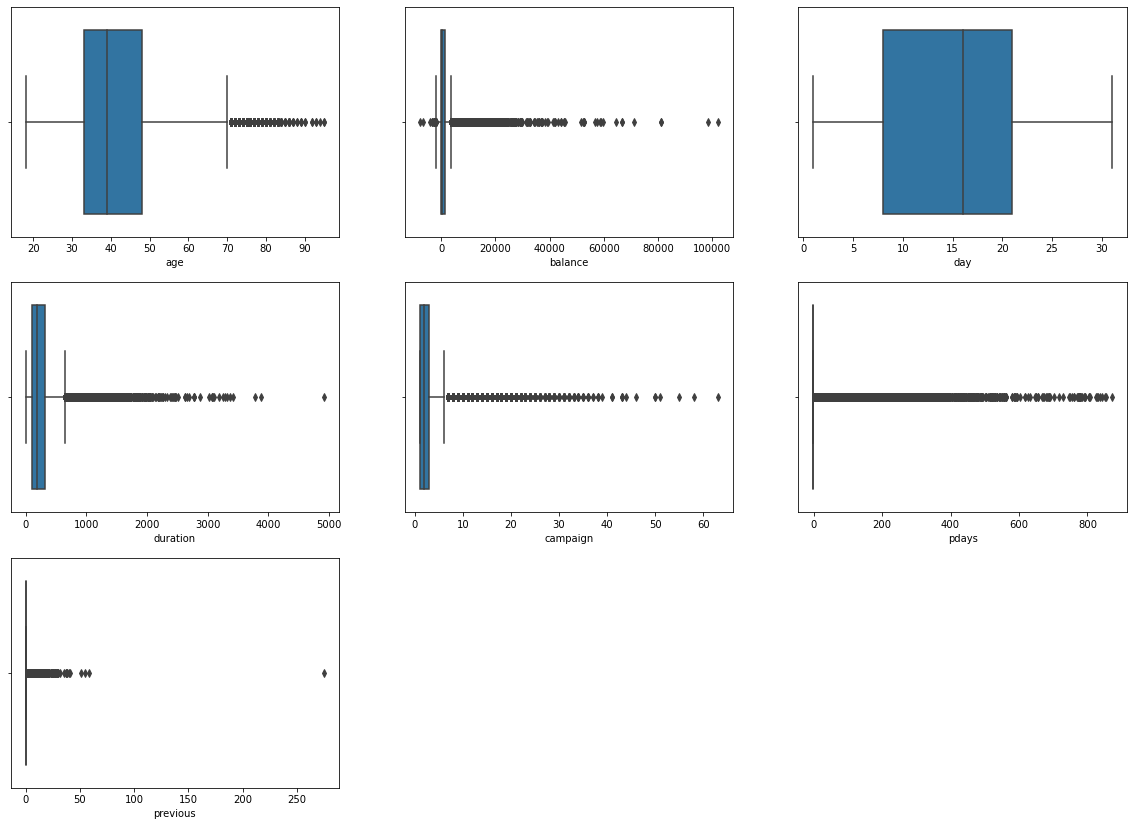

In [25]:
#finding outliers in numerical features using boxplot
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_variables:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

## Correlation

<AxesSubplot:>

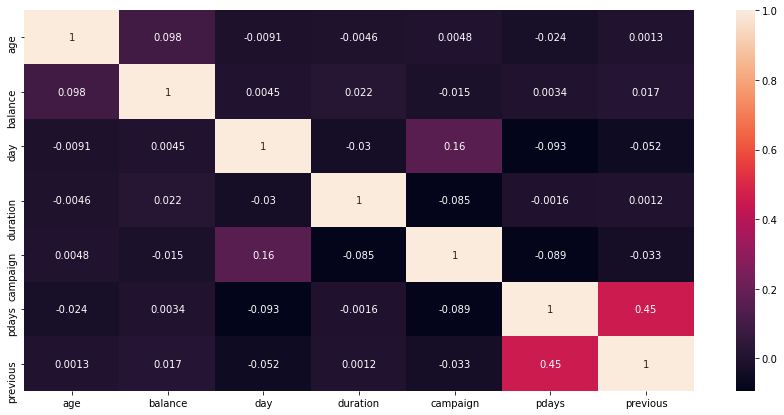

In [26]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

#### Check whether the dataset is balanced

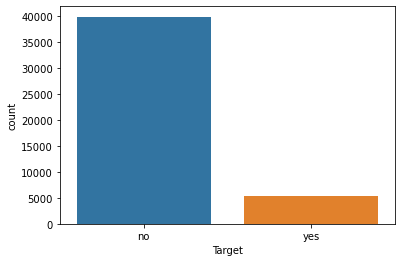

In [27]:
sns.countplot(x='Target',data=df)
plt.show()

In [28]:
df['Target'].groupby(df['Target']).count()

Target
no     39922
yes     5289
Name: Target, dtype: int64

## Data Cleaning

In [29]:
df2=df.copy()

In [30]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [31]:
df2.shape

(45211, 17)

In [32]:
#default features does not play important role
df2.groupby(['Target','default']).size()

Target  default
no      no         39159
        yes          763
yes     no          5237
        yes           52
dtype: int64

In [33]:
df2.drop(['default'],axis=1, inplace=True)

In [34]:
df2.groupby(['Target','pdays']).size()

Target  pdays
no      -1       33570
         1           9
         2          35
         3           1
         4           1
                 ...  
yes      804         1
         805         1
         828         1
         842         1
         854         1
Length: 914, dtype: int64

In [35]:
# drop pdays as it has -1 value for around 40%+ 
df2.drop(['pdays'],axis=1, inplace=True)

In [36]:
# remove outliers in feature age...
df2.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 18 to 95

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [37]:
# remove outliers in feature balance...
df2.groupby(['Target','balance'],sort=True)['balance'].count()
# these outliers should not be removed as balance increases, client shows interest on deposit

Target  balance
no      -8019      1
        -6847      1
        -4057      1
        -3372      1
        -3313      1
                  ..
yes      34646     1
         36252     1
         45248     1
         52587     2
         81204     2
Name: balance, Length: 9258, dtype: int64

In [38]:
# remove outliers in feature duration...
df2.groupby(['Target','duration'],sort=True)['duration'].count()
# these outliers should not be removed as duration increases, client shows interest on deposit

Target  duration
no      0            3
        1            2
        2            3
        3            4
        4           15
                    ..
yes     3094         1
        3102         1
        3183         1
        3253         1
        3881         1
Name: duration, Length: 2627, dtype: int64

In [39]:
# remove outliers in feature campaign...
df2.groupby(['Target','campaign'],sort=True)['campaign'].count()

Target  campaign
no      1           14983
        2           11104
        3            4903
        4            3205
        5            1625
                    ...  
yes     20              1
        21              1
        24              1
        29              1
        32              1
Name: campaign, Length: 70, dtype: int64

In [40]:
df3 = df2[df2['campaign'] < 33]

In [41]:
df3.groupby(['Target','campaign'],sort=True)['campaign'].count()

Target  campaign
no      1           14983
        2           11104
        3            4903
        4            3205
        5            1625
        6            1199
        7             688
        8             508
        9             306
        10            252
        11            185
        12            151
        13            127
        14             89
        15             80
        16             77
        17             63
        18             51
        19             44
        20             42
        21             34
        22             23
        23             22
        24             19
        25             22
        26             13
        27             10
        28             16
        29             15
        30              8
        31             12
        32              8
yes     1            2561
        2            1401
        3             618
        4             317
        5             139
        6            

In [42]:
# remove outliers in feature previous...
df3.groupby(['Target','previous'],sort=True)['previous'].count()

Target  previous
no      0           33532
        1            2189
        2            1650
        3             848
        4             543
                    ...  
yes     26              1
        29              1
        30              1
        55              1
        58              1
Name: previous, Length: 66, dtype: int64

In [43]:
df4 = df3[df3['previous'] < 31]

In [44]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [45]:
bool_columns = ['housing', 'loan', 'Target']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [46]:
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,Target_new
0,58,2143,5,261,1,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
1,44,29,5,151,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,33,2,5,76,1,0,0,1,0,0,...,1,0,0,0,0,0,1,1,1,0
3,47,1506,5,92,1,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,33,1,5,198,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


## Splitting the dataset into Training set and Test set

In [47]:
X = df4.drop(['Target_new'],axis=1)
y = df4['Target_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [48]:
len(X_train)

36128

In [49]:
len(X_test)

9033

## Model Selection

In [50]:
# using below two models, which are RandomForestClassifier and XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [51]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.90866316 0.90451149 0.90119015 0.90560554 0.90906574]
0.9058072148153965


In [52]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.90783283 0.90617216 0.9017437  0.90906574 0.90311419]
0.9055857232197839


## Model Building

In [56]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [57]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [58]:
model_xgb.score(X_test,y_test)

0.899147570021034

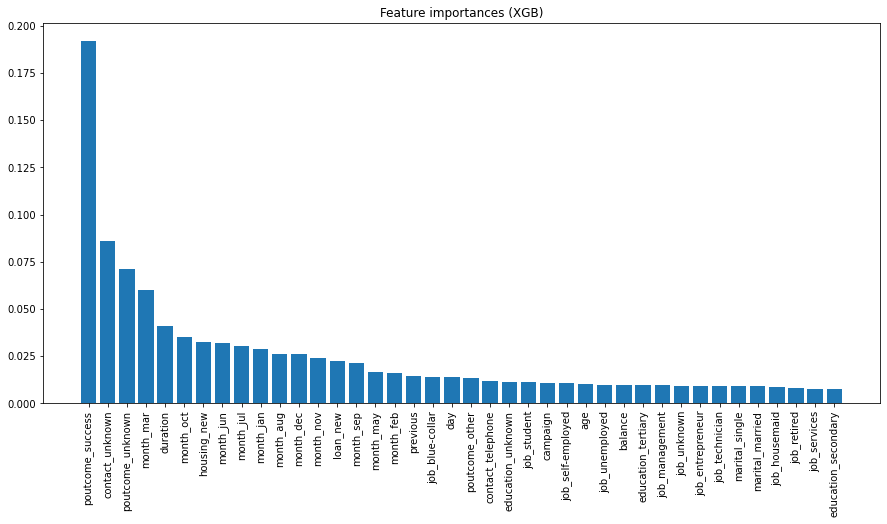

In [59]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [60]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[7606,  344],
       [ 567,  516]])

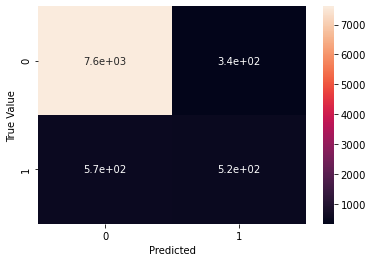

In [61]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()